In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

import warnings
warnings.filterwarnings(action='once')

### I - Tentative pour trouver d'où viennent les pertes de lignes .... Infructueux .... 

In [2]:
merged = pd.read_csv('../data_CROUS/data_processed/merged_one_hot/merged_Forms_Choix.csv' , sep=",", encoding='latin-1')
print(merged.shape)

choix_merged = pd.read_csv('../data_CROUS/data_processed/merged_one_hot/merged_Choix.csv' , sep=",", encoding='latin-1')
print(choix_merged.shape)

form_merged = pd.read_csv('../data_CROUS/data_processed/merged_one_hot/merged_Formulaires.csv' , sep=",", encoding='latin-1')
print(form_merged.shape)
print('len n form')
print(len(form_merged['N° Formulaire'].unique()))

print('diff1')
diff1 = list(set(form_merged['N° Formulaire']) - set(choix_merged['Numéro de formulaire ']))
diff2 = list(set(choix_merged['Numéro de formulaire ']) - set(form_merged['N° Formulaire']))
print(diff1)
print(len(diff1))

print('diff2')
print(diff2)
print(len(diff2))

print('diff3')
diff3 = list(set(diff1)-set(diff2))
print(len(diff3))

print('diff4')
diff4 = list(set(diff2)-set(diff1))
print(len(diff4))

#print(merged.index)
print(merged.shape)

(326, 107)
(437, 80)
(458, 27)
len n form
458
diff1
['7Y5A', '5E1R', '7G6O', '1V3V', '3B0P', '0F1W', '1B5H', '9I3E', '9D5O', '2F8S', '6Y2Q', '0Y2Q', '9K2R', '4W2W', '6O7D', '6W7R', '8S3I', '3X3L', '8I1P', '1K9O', '8D7G', '9Y7K', '3Y2X', '2K0V', '6S8Q', '8W4J', '2G9N', '9Z3Q', '2U5M', '4S3S', '0B8S', '0F1Q', '9A9I', '5S8N', '5I5P', '1O7J', '2A7F', '0G2I', '2F2B', '7A3V', '0R6G', '6C0S', '9I5V', '1D1I', '2C5C', '8K6W', '0A5K', '1O2T', '0D4Y', '4C3L', '4D2Z', '6X8Q', '4E4W', '6E9U', '3Y9M', '4G9N', '9A0P', '5C0L', '5R0T', '7R7Y', '1M2F', '3B3T', '0R1F', '2A4L', '1N8M', '2R4B', '7K8M ', '5Y3F', '3P0Q', '7F5T', '4I6K', '1N9J', '3J7B', '8X7O', '1D4B', '3C2F', '4R8R', '5Y3W', '6J0A', '6R1H', '9W3O', '7L7R', '0F7G', '5W0Z', '6F8P', '2W0S', '8O0N', '3S6B', '2F1L', '3W3R', '9Z6L', '8C3Z', '4Z9V', '4K9H', '1T2X', '8E1F', '2W1G', '3D2G', '4Q1C', '0O9T', '2M6T', '3D2B', '1B3G', '5L0V', '3P8D', '2Y7T', '6T9D', '1S8D', '9F9T', '2E4O', '0I6B', '0T8Q', '2H4R', '4G8T', '0V2T', '7Y2Y', '4H1B', '2P1V', '8

In [3]:
len(set(choix_merged['Numéro de formulaire ']) ^ set(form_merged['N° Formulaire']))

232

In [4]:
common = []
for item in choix_merged['Numéro de formulaire ']:
    #print(item)
    if item in form_merged['N° Formulaire']:
        print('cc')
        common.append(item)
print(len(common))

for item in choix_merged['Numéro de formulaire ']:
    if item in form_merged['N° Formulaire']:
        if item not in common:
            print('en vla un ')
        #common.append(item)

0


### B - Correlations 

In [5]:
# pour chaque personne on r
correlations = pd.DataFrame(columns = ['individu', 'corr_tot', 'corr_convives'])

for i, n_form in enumerate(merged['index']):
    print(n_form)
    friends = []
    for colonne in ['Ami 1','Ami 2','Ami 3','Ami 4','Ami 5']:
        num_friend = merged[colonne][i]
        if type(num_friend) == str:
            friends.append(num_friend)

    # ----------- On calcule le produit scalaire entre les plateaux des amis  ------------
    ps_convives = 0 # on initialise la somme du produit scalaire à 0 
    plateau_1 = np.array(merged.loc[merged['index'] == n_form]).flatten() # le plateau de l'individu que l'on étudie 
    plateau_1 = plateau_1[28:-1]

    for ami in friends:
        if (merged['index'] == ami).sum(): # si l'ami existe

            #print('cc')
            plateau_2 = np.array(merged.loc[merged['index'] == ami]).flatten()
            #print('plateau_2')
            #print(plateau_2)
            plateau_2 = plateau_2[28:-1]

            #print(len(plateau_1), len(plateau_2))
            try:
                ps_convives += np.dot(plateau_1, plateau_2.T)
            except:
                print()
        else : 
            friends.remove(ami)
    try:
        ps_convi_norm = ps_convives/len(friends)
    except:
        ps_convi_norm = 0 # si l'individu  mangé seul, alors corrélation avec le plateau de ses amis = 0 

    # ----------- On calcule le produit scalaire entre tous les plateaux et celui de l'indiv étudié   ------------
    ps_tot = 0
    for indiv in merged['index'][0:10]:
        if indiv != n_form:
            plateau_2 = np.array(merged.loc[merged['index'] == indiv]).flatten()
            plateau_2 = plateau_2[28:-1]
            ps_tot += np.dot(plateau_1, plateau_2.T)


    # On rajoute la ligne 

    #df = pd.concat([df, pd.DataFrame.from_records([{ 'a': 1, 'b': 2 }])])
    correlations = pd.concat([correlations,pd.DataFrame.from_records([{'individu' : n_form,'corr_tot' : ps_tot/len(merged), 'corr_convives': ps_convi_norm}])]) # on ajoute la ligne 



0A2A
0A4U
0A8B
0B2M
0C8K
0E2X
0G1P
0G5M
0H2B
0H5L
0H8R
0I7G
0J8O
0M0L
0N3Z
0N9G
0N9P
0O5Q
0P1I
0P1K
0P5K
0R4C
0R4J
0R4X
0R7V
0S0Q
0S4Y
0S7C
0T3B
0U8E
0X7C
0Y1T
0Y5X
1A9V
1B0U
1B2S
1C3K
1C5X
1C8S
1F7A
1F9Y
1G3P
1G6O
1G7G
1I1F
1J4B
1J5T
1J6P
1J8K
1L0F
1L4G
1M2Q
1M4Q
1M5C
1N9S
1O0R
1O2H
1P5N
1Q9K
1R9D
1T2N
1T9W
1U6R
1U7O
1V0X
1W3S
1W6X
1W7I
1W8I
1Y1C
1Y7U
1Y9T
1Y9W
2A1P
2A2L
2B6T
2E1F
2E8L
2E8R
2G0T
2G2S
2G3P
2H3W
2H8Q
2I9R
2J2X
2J2Y
2K9I
2L2Z
2M7S
2N5P
2Q6Z
2Q8X
2R7A
2R9X
2U2X
2U4F
2U8V
2U9G
2W1Q
2W6P
2W9X
2Y1K
2Y1M
2Y1W
2Y2Q
2Y5X
2Z9A
2Z9H
3C4H
3E1Q
3E3Y
3F4Z
3G0E
3H8D
3K7S
3K9G
3L2B
3L6Q
3M5G
3M6S
3O2U
3O6S
3O6U
3Q2Q
3Q5T
3Q7Q
3R3M
3R5P
3R8M
3S3F
3S5G
3T0E
3T0P
3U7V
3U8T
3U9V
3V0A
3V4C
3V6V
3W5V
3W7U
3Y2G
3Y3E
4A1V
4A4Z
4A7O
4B5E
4C0V
4D0S
4D2Y
4D4V
4D8M
4F9D
4H1P
4H1X
4K3B
4L1N
4M4I
4O4Z
4O8C
4P8C
4S9Z
4T1L
4U3U
4U8Q
4U9D
4W5E
4Z5F
5A5R
5B2Z
5B3U
5C7B
5C9D
5D1Z
5D2H
5F9Z
5G0U
5G9R
5H2S
5I1U
5I3E
5I5D
5J1R
5J3M
5L2C
5L7H
5M0T
5M6R
5M7S
5O0Y
5P2B
5Q1R
5Q8O
5Q8S
5R8S
5S4C
5S7A
5U3X
5W3U


    corr_tot  corr_convives
0   0.027607       3.000000
0   0.033742       3.750000
0   0.006135       0.333333
0   0.033742       0.000000
0   0.033742       0.000000
..       ...            ...
0   0.003067       0.000000
0   0.003067       0.000000
0   0.009202       0.000000
0   0.021472       2.000000
0   0.012270       0.000000

[326 rows x 2 columns]


/var/folders/s4/jtrzm_q55_z39rcm6p6xtgp40000gn/T/ipykernel_3972/2485370843.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.heatmap(im_correlations, cmap = 'Oranges', square=True, yticklabels=correlations['individu'][0:25], xticklabels=['total', 'convives'])


<AxesSubplot: >

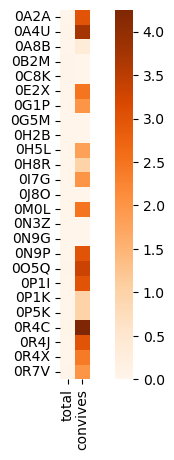

In [6]:
import matplotlib.pyplot as plt 
#print(correlations)
im_correlations = correlations[['corr_tot', 'corr_convives']]
print(im_correlations)
im_correlations = im_correlations[0:25].to_numpy()

sns.heatmap(im_correlations, cmap = 'Oranges', square=True, yticklabels=correlations['individu'][0:25], xticklabels=['total', 'convives'])

In [7]:
# calculons maintenant la moyenne des moyennes 

mean_tot = correlations['corr_tot'].mean()
mean_convives = correlations['corr_convives'].mean()

print(mean_tot, mean_convives)

0.021905227897173397 1.3973926380368098


Le produit scalaire entre le plateau d'un individu et celui de ses convives est beaucoup plus important que celui avec le reste des personnes. 
!!! Ce qu'on fait n'a pas de sens : evidemment que des gens qui n'ont pas mangé le meme jour vont avoir des plats différents, et donc des valeurs de produit scalaire nulles !! 
--> il faut calculer uniquement avec ceux ayant mangé le meme jour !! 

In [8]:
# On crée la liste des gens qui ont mangé le même jour : 

oct_21 = pd.read_csv('../data_CROUS/data_processed/one_hot/Resultats_choix_21_octobre_onehot.csv' , sep=";")
oct_22 = pd.read_csv('../data_CROUS/data_processed/one_hot/Resultats_choix_22_octobre_onehot.csv' , sep=";")
oct_28 = pd.read_csv('../data_CROUS/data_processed/one_hot/Resultats_choix_28_octobre_onehot.csv' , sep=";")
oct_29 = pd.read_csv('../data_CROUS/data_processed/one_hot/Resultats_choix_29_octobre_onehot.csv' , sep=";")

print(oct_21.columns)

nf_oct_21 = list(oct_21['Numéro de formulaire '])
nf_oct_22 = list(oct_22['Numéro de formulaire '])
nf_oct_28 = list(oct_28['Numéro de formulaire '])
nf_oct_29 = list(oct_29['Numéro de formulaire '])

Index(['Unnamed: 0', 'Numéro de formulaire ', 'chouxblancàlajaponaise',
       'saladelentilles', 'champignons', 'carottesrâpées', 'oeufmimosa',
       'saladepates', 'artichauts', 'salami', 'coeursdepalmiers', 'tomates',
       'torsades', 'feuilletésaumonoseille', 'boeufbourguignon', 'kebab',
       'risottocourgettes', 'pizzaraclette', 'faux-filet',
       'pizzamerguezpoivrons', 'hamburger', 'escalopeviennoise',
       'poeléebrocolis', 'frites', 'ratatouille', 'yaourtauxfruits',
       'ufàlaneige', 'faissellenature', 'yaourtnaturesucré',
       'fromageblancfruitsrouges', 'banane', 'mimolette', 'flancchocolat',
       'orange', 'pommegolden', 'kiwi'],
      dtype='object')


In [9]:
distances = pd.DataFrame(columns = ['individu', 'corr_tot', 'corr_convives'])
moy_nf_oct_21 = []
moy_nf_oct_22 = []
moy_nf_oct_28 = []
moy_nf_oct_29 = []

for i, n_form in enumerate(merged['index']):
    #print(n_form)
    friends = []
    for colonne in ['Ami 1','Ami 2','Ami 3','Ami 4','Ami 5']:
        num_friend = merged[colonne][i]
        if type(num_friend) == str:
            friends.append(num_friend)

    # ----------- On calcule le produit scalaire entre les plateaux des amis  ------------
    ps_convives = 0 # on initialise la somme du produit scalaire à 0 
    plateau_1 = np.array(merged.loc[merged['index'] == n_form]).flatten() # le plateau de l'individu que l'on étudie 
    plateau_1 = plateau_1[28:-1]

    for ami in friends:
        if (merged['index'] == ami).sum(): # si l'ami existe

            #print('cc')
            plateau_2 = np.array(merged.loc[merged['index'] == ami]).flatten()
            #print('plateau_2')
            #print(plateau_2)
            plateau_2 = plateau_2[28:-1]

            #print(len(plateau_1), len(plateau_2))
            try:
                ps_convives += np.dot(plateau_1, plateau_2.T)
            except:
                pass
        else : 
            friends.remove(ami)
    try:
        ps_convi_norm = ps_convives/len(friends)
    except:
        ps_convi_norm = 0 # si l'individu  mangé seul, alors corrélation avec le plateau de ses amis = 0 

    # ----------- On calcule le produit scalaire entre tous les plateau DU MEME JOUR et celui de l'indiv étudié   ------------
    ps_tot = 0
    
    if n_form in nf_oct_21:
        jour = nf_oct_21
    if n_form in nf_oct_22:
        jour = nf_oct_22
    if n_form in nf_oct_28:
        jour = nf_oct_28
    if n_form in nf_oct_29:
        jour = nf_oct_29
        
    #print(jour)
    for indiv in jour:
        if indiv != n_form:
            try:
                plateau_2 = np.array(merged.loc[merged['index'] == indiv]).flatten()
                plateau_2 = plateau_2[28:-1]
                ps_tot += np.dot(plateau_1, plateau_2.T)
            except:
                pass # cas où le numero de formuaire de la personne n'est plus dans le df processed 
            # alors il n'y arien à calculer 
        if jour == nf_oct_29:
            moy_nf_oct_29.append(ps_tot/len(merged))
        if jour == nf_oct_28:
            moy_nf_oct_28.append(ps_tot/len(merged))
        if jour == nf_oct_22:
            moy_nf_oct_22.append(ps_tot/len(merged))
        if jour == nf_oct_21:
            moy_nf_oct_21.append(ps_tot/len(merged))
    # On rajoute la ligne 
    distances = pd.concat([distances,pd.DataFrame.from_records([{'individu' : n_form,'corr_tot' : ps_tot/len(merged), 'corr_convives': ps_convi_norm}])]) # on ajoute la ligne 


In [15]:
#print(distances)
print('coucou')
print(len(nf_oct_21), len(nf_oct_22), len(nf_oct_28), len(nf_oct_29))
print(np.array(moy_nf_oct_21).mean(), np.array(moy_nf_oct_22).mean(), np.array(moy_nf_oct_28).mean(), np.array(moy_nf_oct_29).mean())

coucou
131 69 170 67
0.21513335007925932 0.14355018481118773 0.3386170288290314 0.12355618925530107


    corr_tot  corr_convives
0   0.481595       3.000000
0   0.582822       3.750000
0   0.285276       0.333333
0   0.576687       0.000000
0   0.668712       0.000000
..       ...            ...
0   0.150307       0.000000
0   0.174847       0.000000
0   0.088957       0.000000
0   0.754601       2.000000
0   0.463190       0.000000

[326 rows x 2 columns]


/var/folders/s4/jtrzm_q55_z39rcm6p6xtgp40000gn/T/ipykernel_1574/1278726846.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.heatmap(im_distances, cmap = 'Oranges', square=True, yticklabels=distances['individu'][0:25], xticklabels=['total', 'convives'])


<AxesSubplot: >

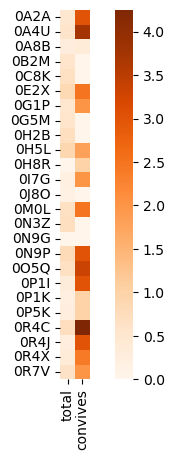

In [191]:
im_distances = distances[['corr_tot', 'corr_convives']]
print(im_distances)
im_distances = im_distances[0:25].to_numpy()
sns.heatmap(im_distances, cmap = 'Oranges', square=True, yticklabels=distances['individu'][0:25], xticklabels=['total', 'convives'])

In [16]:
mean_tot = distances['corr_tot'].mean()
mean_convives = distances['corr_convives'].mean()

print(mean_tot, mean_convives)

0.4851048214084083 1.3973926380368098


C'est mieux : on observe que la distance entre ton plat et celui d'une personne lambda n'est plus de 0, comme c'était le cas avant. 
En revanche, je me demande si la manière que 'on a de calculer la distance n'est pas telle que la distance sera plus faible plus on considère de personnes. Il y a une histoire de normalisation à faire ... On va faire jour par jour et non pas tous les jurs mélangés .

In [25]:
# tous les numeros de la liste n_forms ne sont pas forcément dans nf_oct_jj
# --> on va nettoyer nf_oct_jj pour que ce soit en adéquation 
# les elements qui sont dans nf_oct_jj mais pas dans merged : 

print(len(nf_oct_21))
nf_oct_21 = set(nf_oct_21)
nf_merged_21 = set(list(merged['index']))
nf_oct_21 = list(nf_oct_21.intersection(nf_merged_21))
print(len(nf_oct_21))

print(len(nf_oct_22))
nf_oct_22 = set(nf_oct_22)
nf_merged_22 = set(list(merged['index']))
nf_oct_22 = list(nf_oct_22.intersection(nf_merged_22))
print(len(nf_oct_22))

print(len(nf_oct_28))
nf_oct_28 = set(nf_oct_28)
nf_merged_28 = set(list(merged['index']))
nf_oct_28 = list(nf_oct_28.intersection(nf_merged_28))
print(len(nf_oct_28))

print(len(nf_oct_29))
nf_oct_29 = set(nf_oct_29)
nf_merged_29 = set(list(merged['index']))
nf_oct_29 = list(nf_oct_29.intersection(nf_merged_29))
print(len(nf_oct_29))


99
99
56
56
170
122
67
49


In [26]:
proximites = pd.DataFrame(columns = ['individu', 'corr_tot', 'corr_convives'])


for i, n_form in enumerate(nf_oct_21):
    #print(n_form)
    
    friends = []
    for colonne in ['Ami 1','Ami 2','Ami 3','Ami 4','Ami 5']:
        num_friend = merged[colonne][i]
        if type(num_friend) == str:
            friends.append(num_friend)

    # ----------- On calcule le produit scalaire entre les plateaux des amis  ------------
    ps_convives = 0 # on initialise la somme du produit scalaire à 0 
    plateau_1 = np.array(merged.loc[merged['index'] == n_form]).flatten() # le plateau de l'individu que l'on étudie 
    plateau_1 = plateau_1[28:-1]

    for ami in friends:
        if (merged['index'] == ami).sum(): # si l'ami existe

            #print('cc')
            plateau_2 = np.array(merged.loc[merged['index'] == ami]).flatten()
            #print('plateau_2')
            #print(plateau_2)
            plateau_2 = plateau_2[28:-1]

            #print(len(plateau_1), len(plateau_2))
            try:
                ps_convives += np.dot(plateau_1, plateau_2.T)
            except:
                pass
        else : 
            friends.remove(ami)
    try:
        ps_convi_norm = ps_convives/len(friends)
    except:
        ps_convi_norm = 0 # si l'individu  mangé seul, alors corrélation avec le plateau de ses amis = 0 

    # ----------- On calcule le produit scalaire entre tous les plateau DU MEME JOUR et celui de l'indiv étudié   ------------
    ps_tot = 0
    
    if n_form in nf_oct_21:
        jour = nf_oct_21
    if n_form in nf_oct_22:
        jour = nf_oct_22
    if n_form in nf_oct_28:
        jour = nf_oct_28
    if n_form in nf_oct_29:
        jour = nf_oct_29
        
    #print(jour)
    for indiv in jour:
        if indiv != n_form:
            try:
                plateau_2 = np.array(merged.loc[merged['index'] == indiv]).flatten()
                plateau_2 = plateau_2[28:-1]
                ps_tot += np.dot(plateau_1, plateau_2.T)
            except:
                pass # cas où le numero de formuaire de la personne n'est plus dans le df processed 
            # alors il n'y arien à calculer 

    # On rajoute la ligne 
    proximites = pd.concat([proximites,pd.DataFrame.from_records([{'individu' : n_form,'corr_tot' : ps_tot/len(merged), 'corr_convives': ps_convi_norm}])]) # on ajoute la ligne 

In [27]:
print(proximites)

   individu  corr_tot  corr_convives
0      7P8D  0.585890           2.00
0      7K6G  0.481595           1.75
0      4T1L  0.705521           0.00
0      0B2M  0.576687           0.00
0      2W9X  0.668712           0.00
..      ...       ...            ...
0      0R7V  0.628834           0.00
0      1B2S  0.696319           0.00
0      0S0Q  0.754601           4.25
0      1T2N  0.542945           0.00
0      3U8T  0.690184           0.00

[99 rows x 3 columns]


    corr_tot  corr_convives
0   0.585890           2.00
0   0.481595           1.75
0   0.705521           0.00
0   0.576687           0.00
0   0.668712           0.00
..       ...            ...
0   0.628834           0.00
0   0.696319           0.00
0   0.754601           4.25
0   0.542945           0.00
0   0.690184           0.00

[99 rows x 2 columns]


/var/folders/s4/jtrzm_q55_z39rcm6p6xtgp40000gn/T/ipykernel_3972/1999832129.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.heatmap(im_proximites, cmap = 'Oranges', square=True, yticklabels=proximites['individu'][0:25], xticklabels=['total', 'convives'])


<AxesSubplot: >

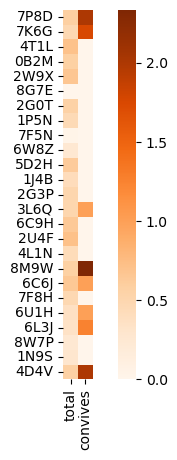

In [29]:
im_proximites = proximites[['corr_tot', 'corr_convives']]
print(im_proximites)
im_proximites = im_proximites[0:25].to_numpy()
sns.heatmap(im_proximites, cmap = 'Oranges', square=True, yticklabels=proximites['individu'][0:25], xticklabels=['total', 'convives'])

In [30]:
mean_tot = proximites['corr_tot'].mean()
mean_convives = proximites['corr_convives'].mean()

print(mean_tot, mean_convives)

0.4929664745615665 0.5045454545454545


Les 2 moyennes sont beaucoup plus proches ... On peut faire le calcul, mais cette fois ci en enlevant du calcul toutes les peronnes qui mangent seules pour la coonne "convives" (ie, les correlations pour 'total' sont calculées avec tout le monde, y compris es personnes qui mangent seules) mais pour la colonne convive, on ne calculera que pour les personnes avec des convives.  
NB : du coup on aura pas le mem nombre de lignes pour faire une matrice (?)